   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


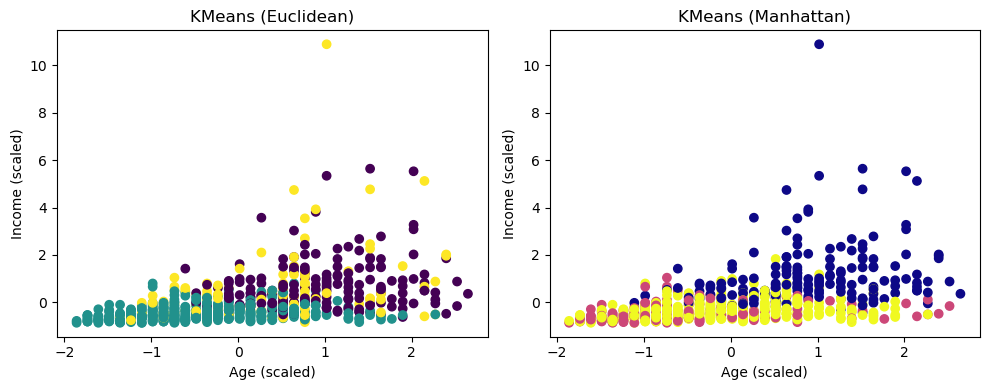

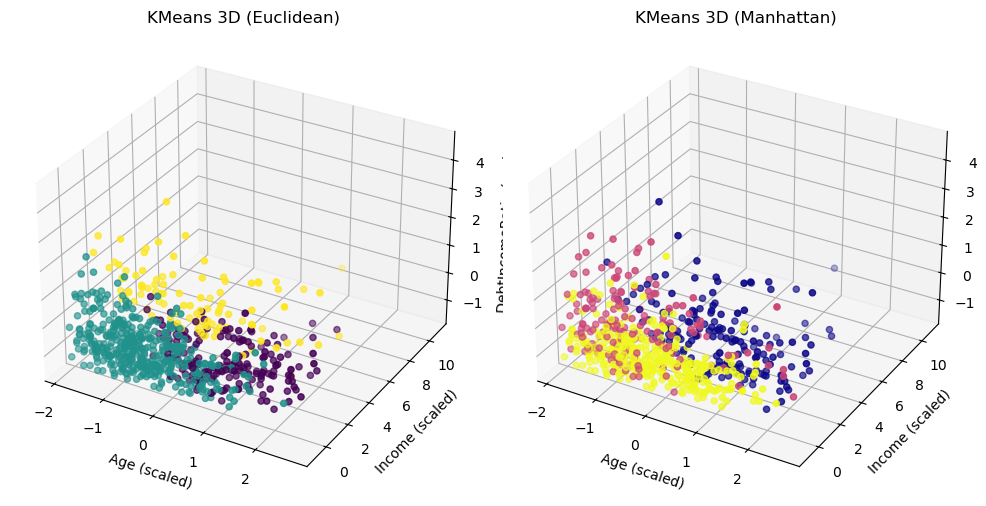

In [16]:
'''Perform hierarchical clustering such as Agglomerative algorithm and Divisive algorithm to group several vehicles. Utilize single, complete, and average linkage to define the cluster. Also draw the dendrogram for this problem.
Dataset: Vehicle dataset
'''
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- DATA PREP ---
# Load the provided vehicle dataset
vehicle = pd.read_csv('vehicle_dataset.csv')
print(ve
# Use only numeric columns for clustering
data = vehicle.select_dtypes(include=np.number).dropna()

# Standardize numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# --- AGGLOMERATIVE CLUSTERING AND DENDROGRAMS ---
plt.figure(figsize=(18, 5))
link_methods = ['single', 'complete', 'average']
for i, method in enumerate(link_methods):
    plt.subplot(1, 3, i + 1)
    Z = linkage(data_scaled, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- AGGLOMERATIVE CLUSTER STRIP PLOT (average linkage, 2 clusters) ---
Z = linkage(data_scaled, method='average')
labels_agg = fcluster(Z, t=2, criterion='maxclust') - 1
plt.scatter(range(len(labels_agg)), labels_agg, c=labels_agg, cmap='Accent')
plt.title('Agglomerative Partition (avg linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Partition')
plt.show()

# --- PSEUDO-DIVISIVE CLUSTER STRIP PLOT (simulated DIANA, 2 clusters) ---
def pseudo_divisive(X, n_clusters=2):
    n = len(X)
    partitions = np.zeros(n, dtype=int)
    cluster_indices = [np.arange(n)]
    label = 1
    while len(cluster_indices) < n_clusters:
        largest = max(cluster_indices, key=len)
        if len(largest) <= 2:
            break
        cluster_indices.remove(largest)
        km = KMeans(n_clusters=2, random_state=0).fit(X[largest])
        mask = km.labels_
        idx0, idx1 = largest[mask == 0], largest[mask == 1]
        cluster_indices.extend([idx0, idx1])
        partitions[idx1] = label
        label += 1
    return partitions

labels_div = pseudo_divisive(data_scaled, n_clusters=2)
plt.scatter(range(len(labels_div)), labels_div, c=labels_div, cmap='Accent')
plt.title('Divisive Partition (pseudo top-down)')
plt.xlabel('Sample Index')
plt.ylabel('Partition')
plt.show()
